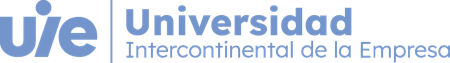

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# PLD5. Clasificación y regresión con árboles de decisión y SVM

En esta PLD5 se contrastarán árboles de decisión y SVM para un problema de clasificación y otro de regresión. Se utilizarán las implementaciones de Scikit-Learn y el conjunto de datos _Iris_.


Tareas a realizar:

1. Entrenar un modelo de árbol de decisión de Scikit-Learn para clasificación. Predecir la especie de flor del conjunto de datos _Iris_ a partir de las cuatro características disponibles (longitud y anchura del sépalo y del pétalo). Referencia Scikit-Learn: `DecisionTreeClassifier`.
2. Utilícese el mismo conjunto de datos anterior, pero considerando la longitud del sépalo como variable objetivo y las otras columnas, incluida la especie, como variables predictoras. Entrenar un modelo de árbol de decisión para regresión. Referencia Scikit-Learn: `DecisionTreeRegressor`.
3. Repítase la tarea 1, pero utilizando un modelo SVM para clasificación. Referencia Scikit-Learn: `SVC`.
4. Repítase la tarea 2, pero utilizando un modelo SVM para regresión. Referencia Scikit-Learn: `SVR`.
5. Comparar los resultados obtenidos entre árboles de decisión y SVM en ambos casos.
6. Experimentar con los hiperparámetros de los modelos para mejorar su rendimiento.


In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

TEST_SPLIT_SIZE = 0.25

In [31]:
iris=load_iris()

In [32]:
display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Preparamos los datos para las tareas 1 y 3

In [33]:
X_class=iris.data
y_class=iris.target

In [34]:
display(X_class)
display(y_class)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Preparamos los datos para la tarea 2 y 4

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
y_regr = iris.data[:, 0]

X_regr = iris.data[:, 1:].copy()
X_regr = np.column_stack((X_regr, iris.target))

display(X_regr)
display(y_regr)

array([[3.5, 1.4, 0.2, 0. ],
       [3. , 1.4, 0.2, 0. ],
       [3.2, 1.3, 0.2, 0. ],
       [3.1, 1.5, 0.2, 0. ],
       [3.6, 1.4, 0.2, 0. ],
       [3.9, 1.7, 0.4, 0. ],
       [3.4, 1.4, 0.3, 0. ],
       [3.4, 1.5, 0.2, 0. ],
       [2.9, 1.4, 0.2, 0. ],
       [3.1, 1.5, 0.1, 0. ],
       [3.7, 1.5, 0.2, 0. ],
       [3.4, 1.6, 0.2, 0. ],
       [3. , 1.4, 0.1, 0. ],
       [3. , 1.1, 0.1, 0. ],
       [4. , 1.2, 0.2, 0. ],
       [4.4, 1.5, 0.4, 0. ],
       [3.9, 1.3, 0.4, 0. ],
       [3.5, 1.4, 0.3, 0. ],
       [3.8, 1.7, 0.3, 0. ],
       [3.8, 1.5, 0.3, 0. ],
       [3.4, 1.7, 0.2, 0. ],
       [3.7, 1.5, 0.4, 0. ],
       [3.6, 1. , 0.2, 0. ],
       [3.3, 1.7, 0.5, 0. ],
       [3.4, 1.9, 0.2, 0. ],
       [3. , 1.6, 0.2, 0. ],
       [3.4, 1.6, 0.4, 0. ],
       [3.5, 1.5, 0.2, 0. ],
       [3.4, 1.4, 0.2, 0. ],
       [3.2, 1.6, 0.2, 0. ],
       [3.1, 1.6, 0.2, 0. ],
       [3.4, 1.5, 0.4, 0. ],
       [4.1, 1.5, 0.1, 0. ],
       [4.2, 1.4, 0.2, 0. ],
       [3.1, 1

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

### Dividir en train y test

In [37]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=TEST_SPLIT_SIZE)

X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regr, y_regr, test_size=TEST_SPLIT_SIZE)

In [38]:
# Comprobamos las dimensiones de los subconjuntos

print("X_class_train shape:", X_class_train.shape)
print("X_class_test shape:", X_class_test.shape)
print("y_class_train shape:", y_class_train.shape)
print("y_class_test shape:", y_class_test.shape)

print("X_regr_train shape:", X_regr_train.shape)
print("X_regr_test shape:", X_regr_test.shape)
print("y_regr_train shape:", y_regr_train.shape)
print("y_regr_test shape:", y_regr_test.shape)

X_class_train shape: (112, 4)
X_class_test shape: (38, 4)
y_class_train shape: (112,)
y_class_test shape: (38,)
X_regr_train shape: (112, 4)
X_regr_test shape: (38, 4)
y_regr_train shape: (112,)
y_regr_test shape: (38,)


# Clasificación

### Clasificación con árboles de decisión

1. Entrenar un modelo de árbol de decisión de Scikit-Learn para clasificación. Predecir la especie de flor del conjunto de datos _Iris_ a partir de las cuatro características disponibles (longitud y anchura del sépalo y del pétalo). Referencia Scikit-Learn: `DecisionTreeClassifier`.

In [39]:
dt_class = DecisionTreeClassifier()

In [40]:
dt_class.fit(X_class_train, y_class_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = dt_class.predict(X_class_test)
accuracy_dt = accuracy_score(y_class_test, y_pred_dt)
print("Accuracy ('dt_class')", accuracy_dt)

print(classification_report(y_class_test, y_pred_dt))


Accuracy ('dt_class') 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.82      0.90        11
           2       0.88      1.00      0.94        15

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



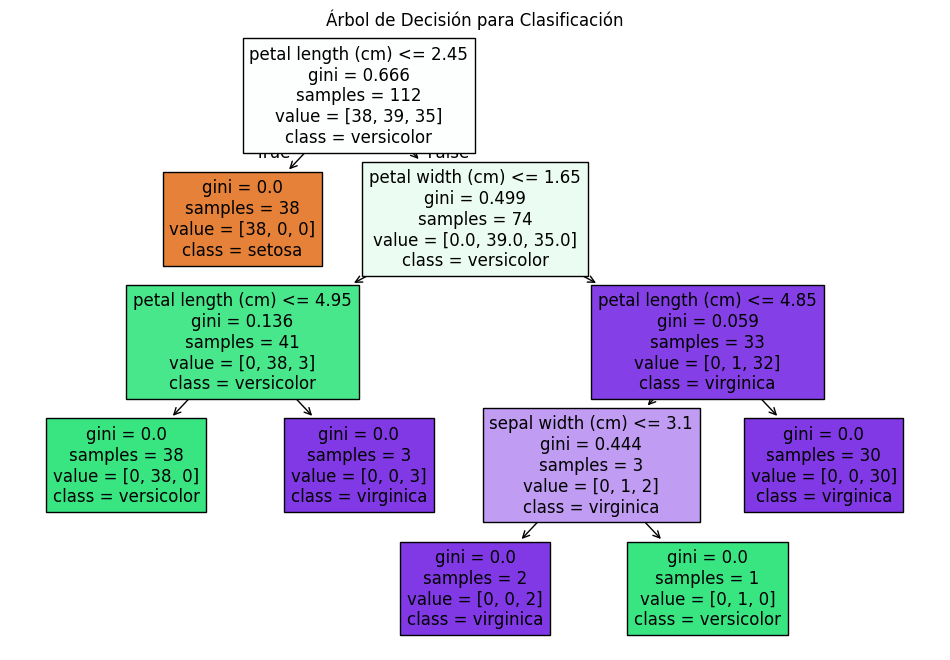

In [48]:
# Pinta el árbol de decisión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(dt_class, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para Clasificación")   
plt.show()

# Clasificación con SVM

3. Repítase la tarea 1, pero utilizando un modelo SVM para clasificación. Referencia Scikit-Learn: `SVC`.

In [56]:
# Repetimos la clasificación con SVM
from sklearn.svm import SVC
svm_clf = SVC() 
svm_clf.fit(X_class_train, y_class_train)
y_pred_svm = svm_clf.predict(X_class_test)
accuracy_svm = accuracy_score(y_class_test, y_pred_svm)
print("Accuracy ('svm_clf'):", accuracy_svm)
print(classification_report(y_class_test, y_pred_svm))


Accuracy ('svm_clf'): 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.82      0.90        11
           2       0.88      1.00      0.94        15

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



# Regresión

### Regresión con árboles de decisión

2. Utilícese el mismo conjunto de datos anterior, pero considerando la longitud del sépalo como variable objetivo y las otras columnas, incluida la especie, como variables predictoras. Entrenar un modelo de árbol de decisión para regresión. Referencia Scikit-Learn: `DecisionTreeRegressor`.

In [53]:
dt_regr = DecisionTreeRegressor()

In [54]:
dt_regr.fit(X_regr_train, y_regr_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [58]:
# Metrificamos el regresor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_regr = dt_regr.predict(X_regr_test)
mse_regr = mean_squared_error(y_regr_test, y_pred_regr)
r2_regr = r2_score(y_regr_test, y_pred_regr)
mape_regr = mean_absolute_percentage_error(y_regr_test, y_pred_regr)
print("MSE ('dt_regr'):", mse_regr)
print("R2 ('dt_regr'):", r2_regr)
print("MAPE ('dt_regr'):", mape_regr)

MSE ('dt_regr'): 0.16894736842105273
R2 ('dt_regr'): 0.7453152240862728
MAPE ('dt_regr'): 0.05609803010727353


# Regresión con SVM

4. Repítase la tarea 2, pero utilizando un modelo SVM para regresión. Referencia Scikit-Learn: `SVR`.


In [57]:
# Repetimos la tarea de regresión con SVM
from sklearn.svm import SVR
svm_regr = SVR()
svm_regr.fit(X_regr_train, y_regr_train)
y_pred_svm_regr = svm_regr.predict(X_regr_test)
mse_svm_regr = mean_squared_error(y_regr_test, y_pred_svm_regr)
r2_svm_regr = r2_score(y_regr_test, y_pred_svm_regr)
mape_svm_regr = mean_absolute_percentage_error(y_regr_test, y_pred_svm_regr)
print("MSE ('svm_regr'):", mse_svm_regr)    
print("R2 ('svm_regr'):", r2_svm_regr)
print("MAPE ('svm_regr'):", mape_svm_regr)


MSE ('svm_regr'): 0.10685671295511688
R2 ('svm_regr'): 0.8389156442731538
MAPE ('svm_regr'): 0.0437512934230288


# Comparación de todos los resultados

5. Comparar los resultados obtenidos entre árboles de decisión y SVM en ambos casos.


In [61]:
# Comparamos todos los resultados
print("Comparación de resultados:")
print("Clasificación con Árbol de Decisión - Accuracy:", accuracy_dt)
print("Clasificación con SVM - Accuracy:", accuracy_svm)
print("Regresión con Árbol de Decisión - MSE:", mse_regr)
print("Regresión con SVM - MSE:", mse_svm_regr)
print("Regresión con Árbol de Decisión - R2:", r2_regr)
print("Regresión con SVM - R2:", r2_svm_regr)
print("Regresión con Árbol de Decisión - MAPE:", mape_regr)
print("Regresión con SVM - MAPE:", mape_svm_regr)


Comparación de resultados:
Clasificación con Árbol de Decisión - Accuracy: 0.9473684210526315
Clasificación con SVM - Accuracy: 0.9473684210526315
Regresión con Árbol de Decisión - MSE: 0.16894736842105273
Regresión con SVM - MSE: 0.10685671295511688
Regresión con Árbol de Decisión - R2: 0.7453152240862728
Regresión con SVM - R2: 0.8389156442731538
Regresión con Árbol de Decisión - MAPE: 0.05609803010727353
Regresión con SVM - MAPE: 0.0437512934230288
